In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [20]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [21]:
train_original=train.copy()
test_original=test.copy()

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


####  Dataset Structure and Content
1. The dataset have 18288 records and 3 columns
2. There are no null values in any columns.
3. Datetime column is of type object. So in the next step we will change its datatype


In [23]:
train['Traffic']=train['Count']
train.drop('Count',axis=1,inplace=True)
train.head()

,ID,Datetime,Traffic
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


#### Fetching Year,Month,Days,Hour and DayName from the Date Column

In [100]:
train['Datetime']=pd.to_datetime(train['Datetime'])
train['Year']=train['Datetime'].apply(lambda x:x.year)
train['Month']=train['Datetime'].apply(lambda x:x.month)
train['Day']=train['Datetime'].apply(lambda x:x.day)
train['Hour']=train['Datetime'].apply(lambda x:x.hour)
train['DayName']=train['Datetime'].apply(lambda x:x.strftime("%A"))  #**IMP**

In [64]:
train.head()

,ID,Datetime,Traffic,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


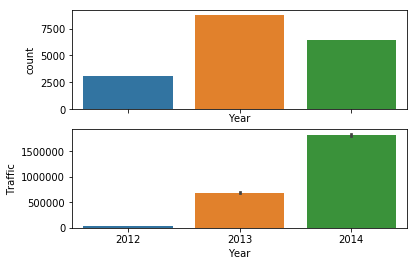

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
sns.countplot(x='Year',data=train,ax=ax1)
sns.barplot(x='Year',y='Traffic',data=train,ax=ax2,estimator=sum)

#### Keys Observation
1. We observe the total entries for Year 2012 and 2014 is way less than 2013 indicating we don't have all the dates or less entries for year 2012 and 2014.
2. We can see the Traffic increasing exponentially each Year. Even with less records for year 2014 we have see the traffic is double.

Conclusion:Traffic Increases Each Year

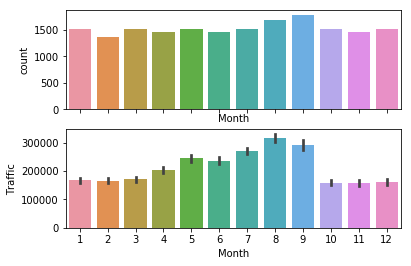

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
sns.countplot(x='Month',data=train,ax=ax1)
sns.barplot(x='Month',y='Traffic',data=train,ax=ax2,estimator=sum)

#### Key Observation
1. We see the total entries for each month is almost the same but keep in mind from the previous visualization 2012 and 2014 have less entries indicating that 2012 have records more from later months and 2014 have records more from the earlier months. 

Conclusion: So this is a very misleading visualization

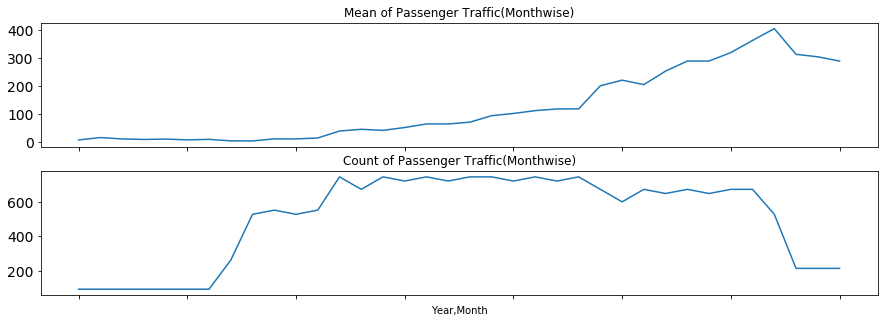

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
temp=train.groupby(['Year', 'Month'])['Traffic'].mean() 
c=train.groupby(['Year', 'Month'])['Traffic'].count() 
temp.plot(figsize=(15,5), title= 'Mean of Passenger Traffic(Monthwise)', fontsize=14,ax=ax1)
c.plot(figsize=(15,5), title= 'Count of Passenger Traffic(Monthwise)', fontsize=14,ax=ax2)

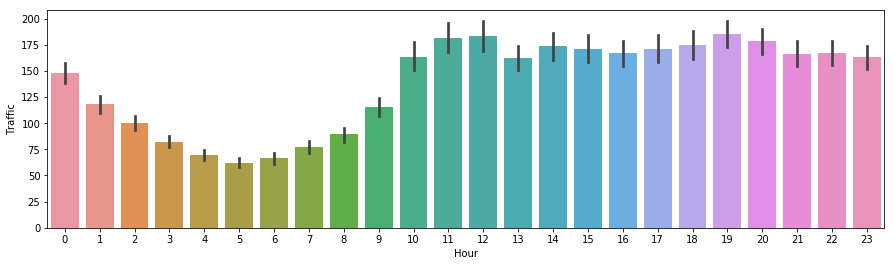

In [78]:
plt.figure(figsize=(15,4))
sns.barplot(x='Hour',y='Traffic',data=train)

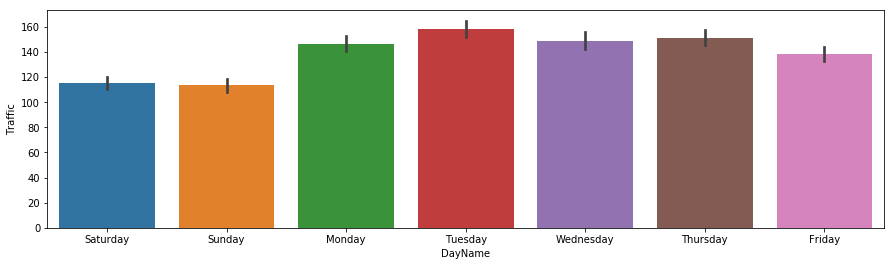

In [101]:
plt.figure(figsize=(15,4))
sns.barplot(x='DayName',y='Traffic',data=train)

#### Observations
1. There is a peak from 11am till midnight 
2. There is a less demand during weekends compare to weekdays

#### Lets create a column name weekend  and see its traffic distribution

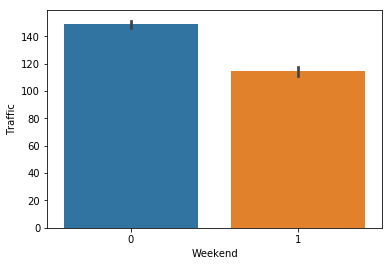

In [116]:
train['Weekend']=train['DayName'].apply(lambda x:1 if (x=='Saturday' or x=='Sunday')  else 0)
sns.barplot(x='Weekend',y='Traffic',data=train)

In [122]:
train.drop('ID',1,inplace=True)

In [117]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [123]:
hourly = train.resample('H').mean()

In [124]:
hourly

,Traffic,Year,Month,Day,Hour,Weekend
Datetime,,,,,,
2012-01-09 00:00:00,8.0,2012.0,1.0,9.0,0.0,0.0
2012-01-09 01:00:00,4.0,2012.0,1.0,9.0,1.0,0.0
2012-01-09 02:00:00,4.0,2012.0,1.0,9.0,2.0,0.0
2012-01-09 03:00:00,2.0,2012.0,1.0,9.0,3.0,0.0
2012-01-09 04:00:00,2.0,2012.0,1.0,9.0,4.0,0.0
2012-01-09 05:00:00,2.0,2012.0,1.0,9.0,5.0,0.0
2012-01-09 06:00:00,4.0,2012.0,1.0,9.0,6.0,0.0
2012-01-09 07:00:00,4.0,2012.0,1.0,9.0,7.0,0.0
2012-01-09 08:00:00,2.0,2012.0,1.0,9.0,8.0,0.0


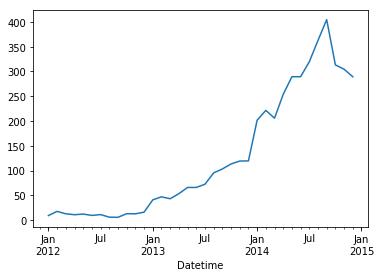

In [126]:
 train.resample('M').mean().Traffic.plot()